 # <center>**EDA de los datasets**

En este Jupyter se lleva a cabo el Analisis Exploratorio de los Datos de los tres datasets limpios para poder elegir las variables que seran usadas en las funciones y modelo de recomendacion solicitados. 


## Importaciones

Importamos las librerias necesarias para comenzar el proceso de EDA

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Extraccion de la informacion

Se extraen los datos desde el archivo 'Output_Steam_limpia.csv', 'australian_user_items_limpia.csv' y 'australian_user_reviews_limpia.csv'

In [4]:
steam = pd.read_csv('Output_Steam_limpia.csv', encoding='utf-8') 
items = pd.read_csv('australian_user_items_limpia.csv', encoding='utf-8') 
reviews = pd.read_csv('australian_user_reviews_limpia.csv', encoding='utf-8', index_col=0) 

# **EDA outputs steam**

In [5]:
steam

,genres,title,id,developer,year_release
0,Action,Lost Summoner Kitty,761140,Kotoshiro,2018
1,Casual,Lost Summoner Kitty,761140,Kotoshiro,2018
2,Indie,Lost Summoner Kitty,761140,Kotoshiro,2018
3,Simulation,Lost Summoner Kitty,761140,Kotoshiro,2018
4,Strategy,Lost Summoner Kitty,761140,Kotoshiro,2018
...,...,...,...,...,...
71546,Indie,Russian Roads,610660,Laush Dmitriy Sergeevich,2018
71547,Racing,Russian Roads,610660,Laush Dmitriy Sergeevich,2018
71548,Simulation,Russian Roads,610660,Laush Dmitriy Sergeevich,2018
71549,Casual,EXIT 2 - Directions,658870,"xropi,stev3ns",2017


Contamos con un total de 71551 registros.
Procedemos a revisar si hay valores nulos y los tipos de datos con los que contamos

In [6]:
def info_nulos(dataframe):
    datos = {"Columna": [], "tipo_de_dato": [], "%_no_nulos": [], "%_nulos": [], "nulos": []}

    for columna in dataframe.columns:
        no_nulos = (dataframe[columna].count() / len(dataframe)) * 100
        datos["Columna"].append(columna)
        datos["tipo_de_dato"].append(dataframe[columna].apply(type).unique())
        datos["%_no_nulos"].append(round(no_nulos, 2))
        datos["%_nulos"].append(round(100-no_nulos, 2))
        datos["nulos"].append(dataframe[columna].isnull().sum())

    df_info = pd.DataFrame(datos)
        
    return df_info

info_nulos(steam)

,Columna,tipo_de_dato,%_no_nulos,%_nulos,nulos
0,genres,[<class 'str'>],100.00,0.00,0
1,title,"[<class 'str'>, <class 'float'>]",100.00,0.00,2
2,id,[<class 'int'>],100.00,0.00,0
3,developer,"[<class 'str'>, <class 'float'>]",99.51,0.49,350
4,year_release,[<class 'int'>],100.00,0.00,0


No se encuentran nulos o al menos no unporcentaje representativo

## Analisis Genres

In [7]:
def porcentaje_top_n(df, column, top_n=10):
    counts = df[column].value_counts()
    total = len(df[column])
    percentages = (counts / total) * 100
    result_df = pd.DataFrame({'Cantidad': counts, 'Porcentaje': percentages})
    
    # Filtra para incluir solo los top_n valores más importantes
    result_top_n = result_df.head(top_n)
    
    return result_top_n

# Llama a la función con tu DataFrame y la columna 'genres'
result_top_5= porcentaje_top_n(steam, 'genres', top_n=5)

result_top_5

,Cantidad,Porcentaje
genres,,
Indie,15858,22.163212
Action,11319,15.819485
Casual,8282,11.574961
Adventure,8242,11.519056
Strategy,6957,9.723135


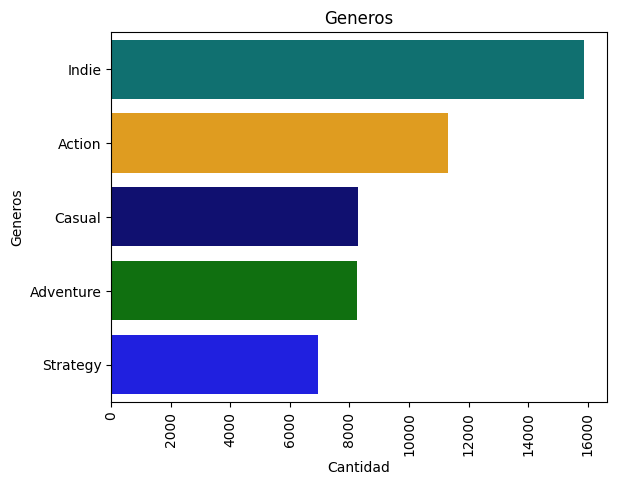

In [8]:
top_genres = steam['genres'].value_counts().head(5)

colores = ["teal", "orange", "navy", "green", "blue", "purple", "black", "pink", "red"]
sns.countplot(data=steam[steam['genres'].isin(top_genres.index)], y='genres', order=top_genres.index, palette=colores, legend=False)
plt.xticks(rotation=90)
plt.xlabel('Cantidad')
plt.ylabel('Generos')
plt.title('Generos')
warnings.filterwarnings("ignore")

El genero mas jugado con un 22% es el Indie, seguido de action con un 16% aproximadamente y finalmente los juegos casuales con un 12%.

## Analisis Title

In [9]:
total_juegos = len(steam['title'].unique())
total_juegos

28828

Hay un total de 28828 juegos en la base de datos de steam

## Analisis Developer

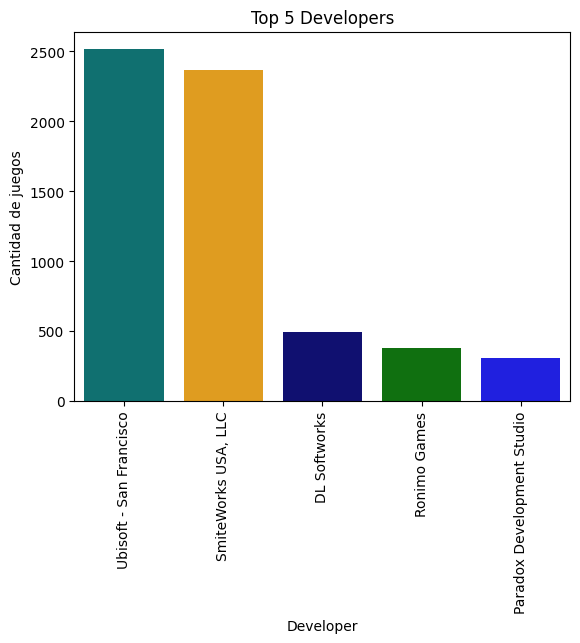

In [10]:
# Cantidad de juegos
developer = steam['developer'].value_counts()

# Selecciona los 5 principales desarrolladores en orden descendente
top_developers = developer.sort_values(ascending=False).head(5)

# Crea un gráfico de barras
plt.figure()
colores = ["teal", "orange", "navy", "green", "blue", "purple", "black"]
sns.barplot(x=top_developers.index, y=top_developers.values, hue=top_developers.index, palette=colores, dodge=False)
plt.xticks(rotation=90)
plt.xlabel('Developer')
plt.ylabel('Cantidad de juegos')
plt.title('Top 5 Developers')
warnings.filterwarnings("ignore")
plt.show()

Ubisoft y SmiteWorks son los que mas juegos han desarrollado 

## Analisis Year

In [11]:
def porcentaje_top_n(df, column, top_n=10):
    counts = df[column].value_counts()
    total = len(df[column])
    percentages = (counts / total) * 100
    result_df = pd.DataFrame({'Cantidad': counts, 'Porcentaje': percentages})
    
    # Filtra para incluir solo los top_n valores más importantes
    result_top_n = result_df.head(top_n)
    
    return result_top_n

# Llama a la función con tu DataFrame y la columna 'genres'
result_top_5= porcentaje_top_n(steam, 'year_release', top_n=5)

result_top_5

,Cantidad,Porcentaje
year_release,,
2017,24967,34.893992
2016,17667,24.691479
2015,13106,18.317005
2014,6341,8.862210
2013,3016,4.215175


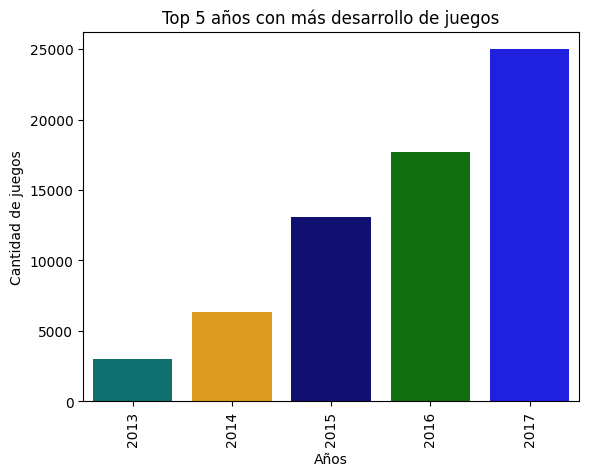

In [12]:
# Cantidad de juegos
year = steam['year_release'].value_counts()

# Selecciona los 5 años con más desarrollo
top_anio = year.sort_values(ascending=False).head(5)

# Invierte el orden de los índices (años) para que aparezcan de mayor a menor en el gráfico
top_anio = top_anio[::-1]

# Crea un gráfico de barras
plt.figure()
colores = ["teal", "orange", "navy", "green", "blue", "purple", "black"]
sns.barplot(x=top_anio.index, y=top_anio.values, palette=colores)
plt.xticks(rotation=90)
plt.xlabel('Años')
plt.ylabel('Cantidad de juegos')
plt.title('Top 5 años con más desarrollo de juegos')
warnings.filterwarnings("ignore")
plt.show()

En el grafico anterior se puede evidenciar los 5 años con mas lanzamientos de juegos en la plataforma, siendo el 2017 el año con mas lanzamientos, cerca del 35% de los juegos se lanzaron en este año.

## Exportacion del dataset

In [13]:
steam.to_csv('Output_Steam_limpia_eda.csv')
print(f'Se guardó el archivo ')

Se guardó el archivo 


# **EDA Australian User Items**

In [14]:
items

,item_id,item_name,playtime_forever,items_count,user_id
0,10,Counter-Strike,6,277,76561197970982479
1,20,Team Fortress Classic,0,277,76561197970982479
2,30,Day of Defeat,7,277,76561197970982479
3,40,Deathmatch Classic,0,277,76561197970982479
4,50,Half-Life: Opposing Force,0,277,76561197970982479
...,...,...,...,...,...
5094077,346330,BrainBread 2,0,7,76561198329548331
5094078,373330,All Is Dust,0,7,76561198329548331
5094079,388490,One Way To Die: Steam Edition,3,7,76561198329548331
5094080,521570,You Have 10 Seconds 2,4,7,76561198329548331


Se cuenta con un total de 5.094.060 filas x 6 columnas
Procedemos a revisar si hay valores nulos y los tipos de datos con los que contamos

In [15]:
def info_nulos(dataframe):
    datos = {"Columna": [], "tipo_de_dato": [], "%_no_nulos": [], "%_nulos": [], "nulos": []}

    for columna in dataframe.columns:
        no_nulos = (dataframe[columna].count() / len(dataframe)) * 100
        datos["Columna"].append(columna)
        datos["tipo_de_dato"].append(dataframe[columna].apply(type).unique())
        datos["%_no_nulos"].append(round(no_nulos, 2))
        datos["%_nulos"].append(round(100-no_nulos, 2))
        datos["nulos"].append(dataframe[columna].isnull().sum())

    df_info = pd.DataFrame(datos)
        
    return df_info

info_nulos(items)

,Columna,tipo_de_dato,%_no_nulos,%_nulos,nulos
0,item_id,[<class 'int'>],100.0,0.0,0
1,item_name,[<class 'str'>],100.0,0.0,0
2,playtime_forever,[<class 'int'>],100.0,0.0,0
3,items_count,[<class 'int'>],100.0,0.0,0
4,user_id,[<class 'str'>],100.0,0.0,0


No se encuentran valores nulos

## Analisis Playtime Forever

En esta columna se encuentra el tiempo en minutos jugado por usuario.

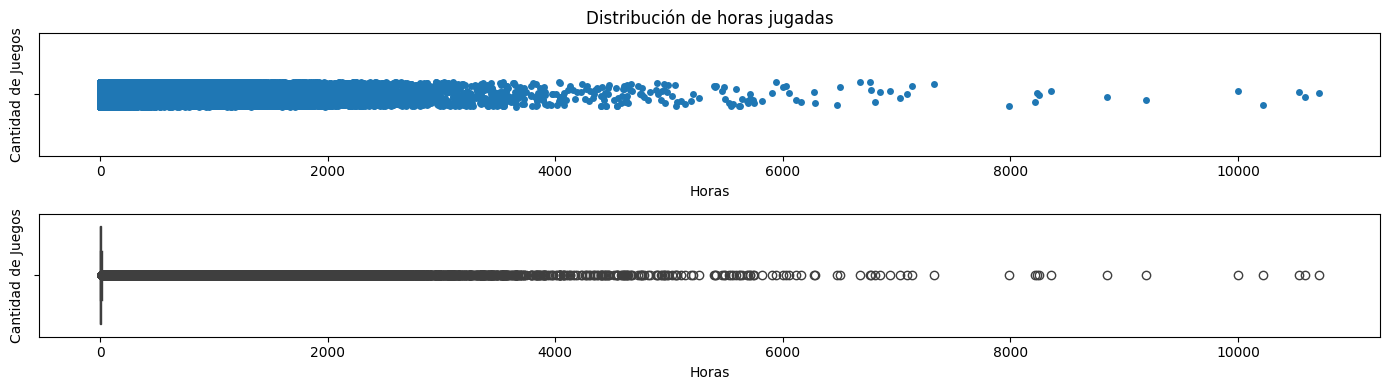

In [16]:
items['playtime_hours'] = items['playtime_forever'] / 60

tamaño_figura = plt.figure(figsize=(14, 4))

ax1 = tamaño_figura.add_subplot(211)
sns.stripplot(data=items, x='playtime_hours', ax=ax1)
ax1.set_xlabel('Horas') ; ax1.set_ylabel('Cantidad de Juegos') ; ax1.set_title('Distribución de horas jugadas')

ax2 = tamaño_figura.add_subplot(212, sharex=ax1)
sns.boxplot(data=items, x='playtime_hours', ax=ax2)
ax2.set_xlabel('Horas') ; ax2.set_ylabel('Cantidad de Juegos')


plt.tight_layout()
plt.show()

In [17]:
estadisticas = items['playtime_hours'].describe()

In [18]:
print(f'El tiempo medio (mediana) de  juego es de: {round(estadisticas[5],2)}')
print(f'El tiempo promedio (mean) de  juegos es de: {round(estadisticas[1],2)}')
print(f'El 75% de los jugadores pasa un total de : {round(estadisticas[6],2)}')


El tiempo medio (mediana) de  juego es de: 0.57
El tiempo promedio (mean) de  juegos es de: 16.51
El 75% de los jugadores pasa un total de : 5.92


Se observa que cada jugador pasa un tiempo medio de 0.57 horas,  en promedio juegan 16 horas y el 75% de los usuarios  estuvieron menos de 6 horas jugando.
En promedio los usuarios pasan 16.5 horas jugando y  el 75% de los usuarios ha pasado 6 horas jugando. Se observa una gran cantidad de valores atipicos por encima de las 16.51 horas esto se puede deber al uso de bots usados en los perfiles de los usuarios. 

## Analisis Items Count

In [19]:
user_items= items.groupby('user_id')['items_count'].unique().explode()
user_items = pd.DataFrame(user_items)
user_items = user_items.sort_values('items_count', ascending=False)

user_items

,items_count
user_id,
phrostb,7762
thugnificent,6700
chidvd,6410
piepai,6132
mayshowganmore,5027
...,...
76561198092978311,1
76561198092984441,1
76561198092985047,1


<Figure size 1600x600 with 0 Axes>

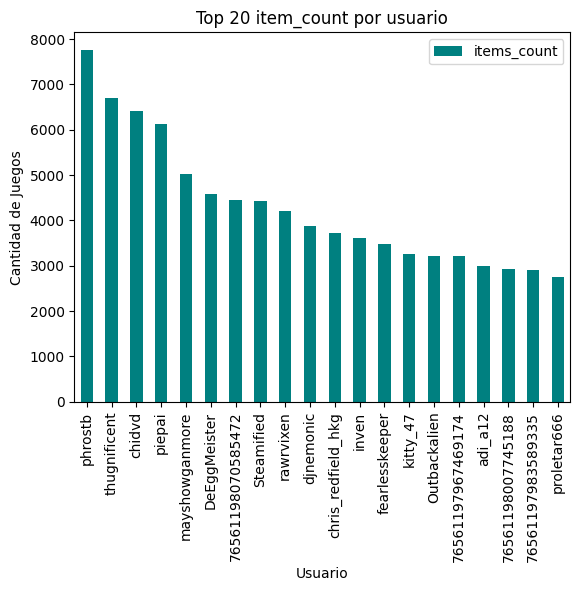

In [20]:
# Grafica cantidad de item por usuarios
colores = ["teal","orange", "navy", "green", "blue", "purple", "black", "pink", "red"]
plt.figure(figsize=(16, 6))
user_items[:20].plot(kind='bar', color=colores[:len(user_items)])
plt.xlabel('Usuario') ; plt.ylabel('Cantidad de Juegos') ; plt.title('Top 20 item_count por usuario')
plt.show()

In [21]:
pd.options.display.float_format = '{:.2f}'.format
print(items['items_count'].describe())

count   5094082.00
mean        315.73
std         696.91
min           1.00
25%          71.00
50%         137.00
75%         275.00
max        7762.00
Name: items_count, dtype: float64


El usuario que mayor cantidad de items tiene es Phrostb con un total de 7762, el 75%  de los jugadores han adquirido al menos 276 juegos.

## Exportacion del dataset

In [22]:
items.to_csv('australian_user_items_limpia_eda.csv')
print('Se guardó el archivo "australian_user_items_limpia_eda.csv"')

Se guardó el archivo "australian_user_items_limpia_eda.csv"


# **EDA Australian User Reviews**

In [23]:
reviews

,item_id,recommend,user_id,sentiment_analysis,year_review
0,1250,True,76561197970982479,2,2011
1,22200,True,76561197970982479,1,2011
2,43110,True,76561197970982479,2,2011
3,251610,True,js41637,2,2014
4,227300,True,js41637,2,2013
...,...,...,...,...,...
58425,70,True,76561198312638244,2,2014
58426,362890,True,76561198312638244,2,2014
58427,273110,True,LydiaMorley,2,2014
58428,730,True,LydiaMorley,2,2014


Contamos con un total de 58.430 registros.
Procedemos a revisar si hay valores nulos y los tipos de datos con los que contamos

In [24]:
def info_nulos(dataframe):
    datos = {"Columna": [], "tipo_de_dato": [], "%_no_nulos": [], "%_nulos": [], "nulos": []}

    for columna in dataframe.columns:
        no_nulos = (dataframe[columna].count() / len(dataframe)) * 100
        datos["Columna"].append(columna)
        datos["tipo_de_dato"].append(dataframe[columna].apply(type).unique())
        datos["%_no_nulos"].append(round(no_nulos, 2))
        datos["%_nulos"].append(round(100-no_nulos, 2))
        datos["nulos"].append(dataframe[columna].isnull().sum())

    df_info = pd.DataFrame(datos)
        
    return df_info

info_nulos(reviews)

,Columna,tipo_de_dato,%_no_nulos,%_nulos,nulos
0,item_id,[<class 'int'>],100.00,0.00,0
1,recommend,[<class 'bool'>],100.00,0.00,0
2,user_id,[<class 'str'>],100.00,0.00,0
3,sentiment_analysis,[<class 'int'>],100.00,0.00,0
4,year_review,[<class 'int'>],100.00,0.00,0


## Analisis de  columna  items_id

No se escuentran valores nulos

In [25]:
def porcentaje_top_n(df, column, top_n=10):
    counts = df[column].value_counts()
    total = len(df[column])
    percentages = (counts / total) * 100
    result_df = pd.DataFrame({'Cantidad': counts, 'Porcentaje': percentages})
    
    # Filtra para incluir solo los top_n valores más importantes
    result_top_n = result_df.head(top_n)
    
    return result_top_n

# Llama a la función con tu DataFrame y la columna 'genres'
result_top_15= porcentaje_top_n(reviews, 'item_id', top_n=15)

result_top_15

,Cantidad,Porcentaje
item_id,,
730,3708,6.35
440,3694,6.32
4000,1704,2.92
570,1544,2.64
218620,1113,1.90
304930,1031,1.76
252490,806,1.38
550,743,1.27
105600,729,1.25


Los juegos a los que mas reviews han realizado son el 730 y el 440

## Analisis de la columna recommend

In [26]:
def porcentaje(df, column):
   counts = df[column].value_counts()
   total = len(df[column])
   percentages = (counts / total) * 100
   return pd.DataFrame({'Cantidad': counts, 'Porcentaje': percentages})


result = porcentaje(reviews, 'recommend')
result

,Cantidad,Porcentaje
recommend,,
True,51691,88.47
False,6739,11.53


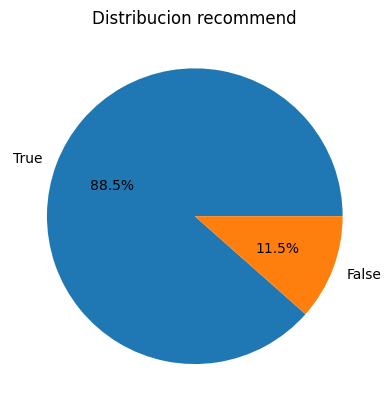

In [27]:
porcentaje=reviews['recommend'].value_counts() / len(reviews) * 100
round(porcentaje),2


valores = porcentaje.values
etiquetas = porcentaje.index

# Crear el gráfico de torta
plt.pie(valores, labels=etiquetas, autopct='%1.1f%%')
plt.title('Distribucion recommend')
plt.show()

Se puede observar en los registros que el 88% de las personas recomiendan el juego consumido y que el 12% no lo hace

## Analisis user_id

In [28]:
def porcentaje(df, column):
   counts = df[column].value_counts()
   total = len(df[column])
   percentages = (counts / total) * 100
   return pd.DataFrame({'Cantidad': counts, 'Porcentaje': percentages})


result = porcentaje(reviews, 'user_id')
result

,Cantidad,Porcentaje
user_id,,
76561198108415635,10,0.02
NanoPi,10,0.02
banksyyo,10,0.02
snubbo,10,0.02
BuffinMutton,10,0.02
...,...,...
554076033,1,0.00
_maximus,1,0.00
maxstupo,1,0.00


La mayor cantidad de reviews de  juego que han puesto han sido 10

## Analisis columna Sentiment Analysis

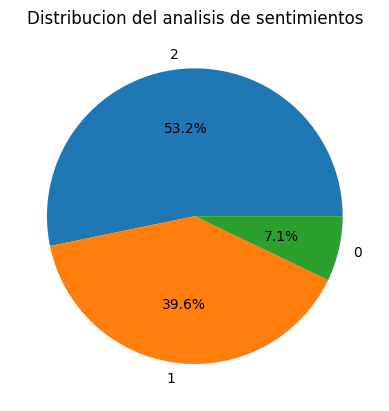

In [29]:
porcentaje=reviews['sentiment_analysis'].value_counts() / len(reviews) * 100
round(porcentaje),2


valores = porcentaje.values
etiquetas = porcentaje.index

# Crear el gráfico de torta
plt.pie(valores, labels=etiquetas, autopct='%1.1f%%')
plt.title('Distribucion del analisis de sentimientos')
plt.show()

Cerca del 53% los reviews relfejan sentimientos neutrales, el 39,6% reflejan sentimientos positivos y cerca del 7% reflejan sentimientos negativos.

## Analisis columna Year

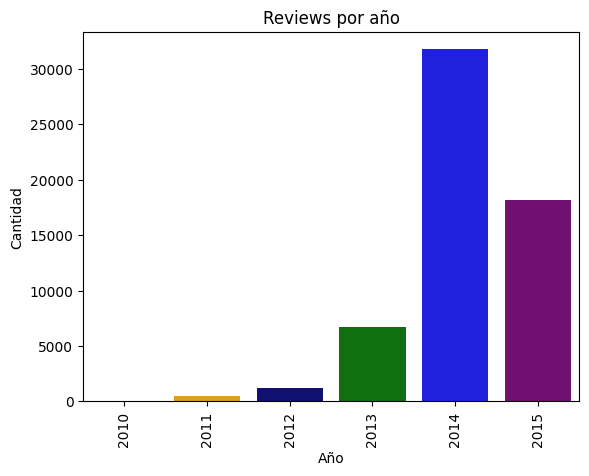

In [30]:
cantidad = reviews['year_review'].value_counts()

plt.figure()
colores = ["teal", "orange", "navy", "green", "blue", "purple", "black"]
sns.barplot(x=cantidad.index, y=cantidad.values, hue=cantidad.index,  palette=colores, legend=False)
plt.xticks(rotation=90)
plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.title('Reviews por año')
warnings.filterwarnings("ignore")
plt.show()

Se puede observar que en los años 2014 y 2015 es donde mas reviews se presentan, ademas de que la cantidad de registros con formato no disponible que se pusieron en 0 o qu eno existe  año del review es alto

In [31]:
reviews

,item_id,recommend,user_id,sentiment_analysis,year_review
0,1250,True,76561197970982479,2,2011
1,22200,True,76561197970982479,1,2011
2,43110,True,76561197970982479,2,2011
3,251610,True,js41637,2,2014
4,227300,True,js41637,2,2013
...,...,...,...,...,...
58425,70,True,76561198312638244,2,2014
58426,362890,True,76561198312638244,2,2014
58427,273110,True,LydiaMorley,2,2014
58428,730,True,LydiaMorley,2,2014


## Exportacion del dataset

In [32]:
reviews.to_csv('australian_user_reviews_limpia_eda.csv',index=False)
print(f'Se guardó el archivo ')

Se guardó el archivo 
